In [1]:
!pip install ipympl
!pip install geopandas

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import geopandas as gpd
import pandas as pd
import descartes
from shapely.geometry import Polygon


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


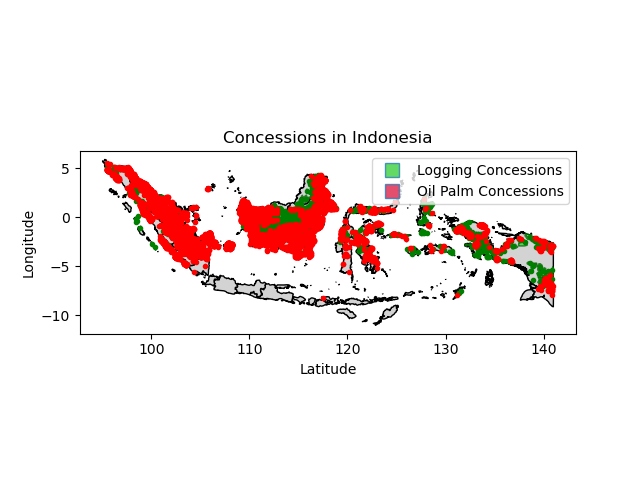

In [2]:
# base layers
indonesia = gpd.read_file("data/indonesia-provinces.geojson") # low res; source: https://github.com/superpikar/indonesia-geojson/blob/master/indonesia.geojson
#indonesia = gpd.read_file("data/indonesia_boundary.json") # high res; source: https://geodata.mit.edu/catalog/stanford-py486tm4357
logging_concessions = gpd.read_file("data/Managed_Forest_Concessions_(WRI).geojson")
oil_palm_concessions = gpd.read_file("data/Greenpeace_Indonesia_Oil_Palm_Concessions_Map_Nov_2020.shp")

# set up plotting
fig = plt.figure()
ax = plt.subplot(111)

# choose more colors here: https://matplotlib.org/stable/gallery/color/named_colors.html
indonesia.plot(ax=ax, color="lightgray", edgecolor = "black", label='Indonesia Land Mass', legend=True) # plot indonesia
logging_concessions.plot(ax=ax, color="limegreen", edgecolor = "darkgreen", alpha=.75, label='Logging Concessions', legend=True) # plot concession regions
oil_palm_concessions.plot(ax=ax, color="crimson", edgecolor = "darkred", alpha=.75, label='Oil Palm Concessions', legend=True) # plot concession regions


# label logging concessions
representative_coords = logging_concessions['geometry'].apply(lambda x: x.representative_point().coords[:])
logging_concessions['coords'] = [coords[0] for coords in representative_coords]
logging_concessions['xcoords'] = [coord[0] for coord in logging_concessions['coords']]
logging_concessions['ycoords'] = [coord[1] for coord in logging_concessions['coords']]

# label with a number index on each concession
#for idx, row in logging_concessions.iterrows():
#     plt.annotate(text=logging_concessions.index[idx], xy=row['coords'],
#                  horizontalalignment='center', fontsize=10, color = "darkgreen")

# label with a dot on each concession
plt.plot(logging_concessions['xcoords'], logging_concessions['ycoords'], 'g.')



# label oil palm concessions
oil_palm_concessions['coords'] = oil_palm_concessions['geometry'].apply(lambda x: x.representative_point().coords[:])
oil_palm_concessions['coords'] = [coords[0] for coords in oil_palm_concessions['coords']]
oil_palm_concessions['xcoords'] = [coord[0] for coord in oil_palm_concessions['coords']]
oil_palm_concessions['ycoords'] = [coord[1] for coord in oil_palm_concessions['coords']]

# label with a number index on each concession
#for idx, row in oil_palm_concessions.iterrows():
#     plt.annotate(text=oil_palm_concessions.index[idx], xy=row['coords'],
#                  horizontalalignment='center', fontsize=10, color = "darkred")
                  
# label with a dot on each concession
plt.plot(oil_palm_concessions['xcoords'], oil_palm_concessions['ycoords'], 'r.')


# legend
lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, markerfacecolor=t.get_facecolor())
    for t in ax.collections[1:]
]
labels = [t.get_label() for t in ax.collections[1:]]
ax.legend(lines, labels, loc='upper right')


plt.title("Concessions in Indonesia")                  
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.axis('scaled')
plt.show()